# Problem Statement: Identify colors present in color image

## Method 1 - Using KMeans Clustering

In [40]:
#Importing necessary libraries
import numpy as np
import cv2
from collections import Counter
from matplotlib import pyplot as plt

import webcolors
from webcolors import CSS3_HEX_TO_NAMES, hex_to_rgb
from webcolors import rgb_to_name


##### Loading  and preprocessing of an image


 Type : <class 'numpy.ndarray'>
 Dimension :3
 Shape of image :(1050, 960, 3)
 Size : uint8



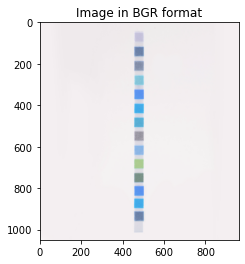

In [51]:
#Reading image in BGR color space

img = cv2.imread(r"U14.png",1)

print(" Type : {}\n Dimension :{}\n Shape of image :{}\n Size : {}".format(type(img), img.ndim, img.shape, img.dtype, img.size))
print()
#figsize =(10,10
plt.figure()
plt.title('Image in BGR format')
plt.imshow(img)
plt.show()

* Gray format - 8 bit, 0-255 range, 1 color - 1 value for a pixel
* RGB format - 24 bit, R(0-255), G(0-255), B(0-255) 3 values for single pixel

In [48]:
#OpenCV supports BGR model. BGR is the same, except the order of areas is reversed.

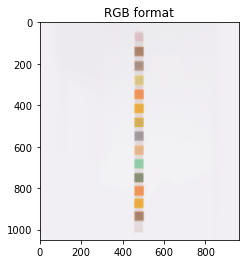

In [47]:
#Read image in RGB color space
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.title('Image in RGB format')
plt.imshow(img_RGB)
plt.show()

In [90]:
print('Oder of pixel in BGR : {} , Order og pixel in RGB: {}'.format(img[0][0], img_RGB[0][0] ))

Oder of pixel in BGR : [244 239 241] , Order og pixel in RGB: [241 239 244]


#### Preprocseesing of image

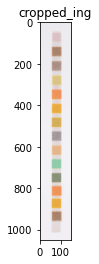

In [104]:
#Cropping the interested image

cropped_img =img_RGB[0:1050, 400:550]
plt.figure()
plt.title('cropped_ing')
plt.imshow(cropped_img)
plt.show()

#### Clustering for  Image Segmentation

* Image segmentation is the classification of an image into different groups.


* K-Means clustering algorithm is used to segment the interest area from the background. It clusters, or partitions the given data into K-clusters based on the K-centroids.

In [55]:
#KMeans expects the input to be of two dimensions

print("Shape of Original Image shape : ", cropped_img.shape)
img_reshape = cropped_img.reshape(cropped_img.shape[0]*cropped_img.shape[1], 3)
print('Shape of image after reshaing : ', img_reshape.shape)


Shape of Original Image shape :  (1050, 150, 3)
Shape of image after reshaing :  (157500, 3)


In [56]:
#clusters of colors
from sklearn.cluster import KMeans
number_of_colors = 15

clf = KMeans(n_clusters = number_of_colors,  n_init =10, max_iter=300)
labels = clf.fit_predict(img_reshape)

In [57]:
labels.shape

(157500,)

In [58]:
clf.max_iter

300

In [59]:
#Creating Counter object to store labels and its counts
counts = Counter(labels)
counts

Counter({1: 37096,
         8: 11805,
         13: 76208,
         6: 4911,
         10: 1468,
         2: 1097,
         0: 4126,
         9: 2474,
         12: 3204,
         14: 1713,
         3: 3934,
         7: 1999,
         11: 3766,
         5: 1773,
         4: 1926})

In [60]:
#Centre of clusters
center_colors = clf.cluster_centers_
center_colors

array([[227.07319438, 191.32186137, 136.20528357],
       [237.28550248, 236.25754798, 239.87090252],
       [203.65213442, 181.2061762 , 167.05812897],
       [240.17844433, 150.6929334 ,  92.54346721],
       [148.30321911, 205.33437175, 171.53686397],
       [138.48166949, 146.91370558, 122.59842076],
       [221.546786  , 203.45728234, 199.03295362],
       [216.05102551, 177.51675838,  90.91695848],
       [227.17280813, 217.96272766, 217.33926302],
       [181.53535354, 150.89010101, 133.90989899],
       [236.42740286, 206.29584185, 169.34628494],
       [234.61975571, 174.39936272,  68.37227828],
       [170.3839174 , 132.23185232, 110.47403004],
       [241.38459217, 240.10729845, 243.83430873],
       [165.67172897, 155.03271028, 157.43516355]])

In [62]:
ordered_colors = [center_colors[i] for i in counts.keys()]

In [83]:

# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]


In [6]:
#Function to create hex values from color
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [66]:
hex_colors

['#e3d9d9',
 '#aa846e',
 '#8a927a',
 '#e3bf88',
 '#f0965c',
 '#f1f0f3',
 '#edecef',
 '#a59b9d',
 '#eaae44',
 '#94cdab',
 '#ddcbc7',
 '#b59685',
 '#d8b15a',
 '#cbb5a7',
 '#eccea9']

In [29]:
RGB2HEX([100,100,100])

'#646464'

#### Webcolors

* Provides functions for working with the color names and color value formats defined by the HTML and CSS specifications for use in documents on the web.


* However webcolors raises an exception if it can't find a match for the requested colour.  Closest matching name for the requested RGB colour found by  Euclidian distance in the RGB space.

In [105]:
# Function to estimate color name using Euclidian distance

def Estimated_colors(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]


In [82]:
# Function to find color name avalable in webcolors

def colorname_using_webcolors(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = Estimated_colors(requested_colour)
        actual_name = None
    return actual_name, closest_name

requested_colour = (119, 172, 152)
actual_name, closest_name = colorname_using_webcolors(requested_colour)

In [71]:
color_name = []
for hexcode in hex_colors:
    rgb_code = webcolors.hex_to_rgb(hexcode)
    #print(rgb_code)
    actual_name, closest_name = get_colour_name(rgb_code)
    print(closest_name)
    color_name.append(closest_name)

gainsboro
rosybrown
gray
burlywood
sandybrown
whitesmoke
whitesmoke
darkgray
sandybrown
darkseagreen
lightgray
rosybrown
sandybrown
tan
wheat


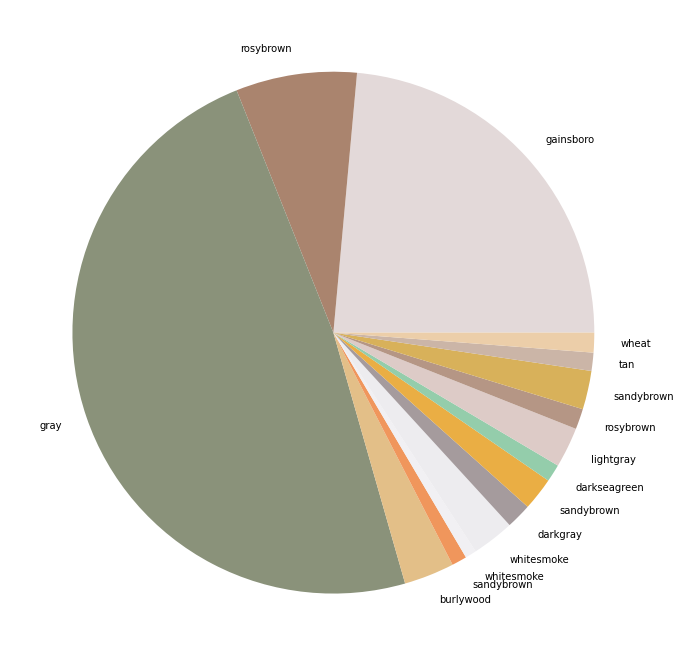

In [84]:

plt.figure(figsize = (12, 12))
plt.pie(counts.values(), labels = color_name, colors = hex_colors)
plt.show()

In [79]:
print("Colors available in image: \n",color_name)

Colors available in image: 
 ['gainsboro', 'rosybrown', 'gray', 'burlywood', 'sandybrown', 'whitesmoke', 'whitesmoke', 'darkgray', 'sandybrown', 'darkseagreen', 'lightgray', 'rosybrown', 'sandybrown', 'tan', 'wheat']


## Method 2 - Identifying Colors using pixel histogram

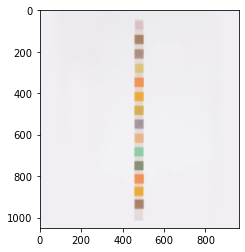

In [88]:
plt.imshow(img_RGB)

In [89]:
#Disctonary of unique pixels and its count
p_dict = {}

for i in range(img_RGB.shape[0]):
    for j in range(img_RGB.shape[1]):
        #print(img_RGB[i][j])
        if str(img_RGB[i][j]) in p_dict:
            p_dict[str(img_RGB[i][j])] = p_dict[str(img_RGB[i][j])]  + 1
        else:
            p_dict[str(img_RGB[i][j])] = 1
p_dict

{'[241 239 244]': 447037,
 '[240 238 243]': 91632,
 '[239 237 242]': 32784,
 '[238 236 241]': 39637,
 '[237 235 240]': 15249,
 '[236 234 239]': 54256,
 '[235 233 238]': 1130,
 '[235 234 239]': 2563,
 '[236 235 240]': 3859,
 '[237 236 241]': 13486,
 '[236 236 238]': 8269,
 '[237 237 239]': 11599,
 '[235 235 237]': 148,
 '[234 233 238]': 74,
 '[237 235 238]': 1235,
 '[235 236 238]': 90,
 '[234 235 237]': 3,
 '[238 233 237]': 46,
 '[236 234 237]': 108,
 '[238 236 239]': 509,
 '[238 238 240]': 1237,
 '[239 234 238]': 133,
 '[237 237 237]': 49,
 '[237 234 241]': 70,
 '[236 237 239]': 118,
 '[236 235 241]': 83,
 '[238 235 242]': 109,
 '[235 234 240]': 65,
 '[240 235 239]': 21,
 '[237 236 242]': 236,
 '[239 234 240]': 9,
 '[238 237 242]': 13719,
 '[236 236 236]': 30,
 '[236 238 237]': 7,
 '[234 232 237]': 23,
 '[236 233 240]': 33,
 '[238 236 237]': 12,
 '[240 234 238]': 13,
 '[239 237 240]': 470,
 '[235 232 239]': 2,
 '[234 233 239]': 3,
 '[237 235 236]': 14,
 '[234 231 238]': 2,
 '[234 234 2

In [91]:
len(p_dict)

9104

In [94]:
# Filtering out the pixel values with less than 10 count. Those pixels might be nisy data

In [95]:
filtered_lst = []
sorted_value = {k: v for k, v in sorted(p_dict.items(), key=lambda item: item[1])}
for item in sorted_value.items():
    if item[1]>10: 
        print(item)
        filtered_lst.append(item[0])


('[233 227 231]', 11)
('[233 224 227]', 11)
('[232 226 230]', 11)
('[230 224 228]', 11)
('[231 225 229]', 11)
('[229 224 228]', 11)
('[235 229 231]', 11)
('[236 221 224]', 11)
('[239 233 233]', 11)
('[216 191 195]', 11)
('[218 198 200]', 11)
('[227 213 212]', 11)
('[231 219 219]', 11)
('[228 214 213]', 11)
('[230 216 213]', 11)
('[223 217 217]', 11)
('[232 224 222]', 11)
('[219 209 210]', 11)
('[225 211 208]', 11)
('[228 208 199]', 11)
('[172 144 132]', 11)
('[174 146 135]', 11)
('[172 148 136]', 11)
('[165 137 126]', 11)
('[232 227 224]', 11)
('[224 213 209]', 11)
('[226 220 220]', 11)
('[227 223 222]', 11)
('[224 219 216]', 11)
('[239 238 236]', 11)
('[241 237 238]', 11)
('[223 203 140]', 11)
('[218 195 128]', 11)
('[220 200 141]', 11)
('[219 199 136]', 11)
('[231 208 200]', 11)
('[232 214 204]', 11)
('[235 208 191]', 11)
('[218 181  93]', 11)
('[219 179  92]', 11)
('[214 174  89]', 11)
('[212 172  84]', 11)
('[212 172  87]', 11)
('[212 176  92]', 11)
('[214 204 205]', 11)
('[181 170

In [96]:
len(filtered_lst)

981

In [98]:
#Function to convert string of pixels into tuple

def str_to_tuple(keys):
    str_ =keys.split("[")[1].split("]")[0]
    lst = str_.split(' ')
    if len(lst) >3:
        modified_lst = []
        for i in lst:
            try:
                if type(int(i)) == int:
                    modified_lst.append(i)
            except:
                #print('Error')
                pass
            
        lst = modified_lst
    mod_lst = [int(i) for i in lst]
    rbg_code = tuple(mod_lst)
    return rbg_code


In [99]:
# For each unique pixel, color name 
color_names = {}
for  keys  in filtered_lst:
    
    rbg_code = str_to_tuple(keys)
    actual_name, closest_name= get_colour_name(rbg_code)
    
    print(actual_name, closest_name, rbg_code)
    
    
    if closest_name in color_names:
        color_names[closest_name] = color_names[closest_name] + 1
    else:
        color_names[closest_name] = 1
        

None gainsboro (233, 227, 231)
None gainsboro (233, 224, 227)
None gainsboro (232, 226, 230)
None gainsboro (230, 224, 228)
None gainsboro (231, 225, 229)
None gainsboro (229, 224, 228)
None linen (235, 229, 231)
None gainsboro (236, 221, 224)
None linen (239, 233, 233)
None thistle (216, 191, 195)
None thistle (218, 198, 200)
None gainsboro (227, 213, 212)
None gainsboro (231, 219, 219)
None gainsboro (228, 214, 213)
None gainsboro (230, 216, 213)
None gainsboro (223, 217, 217)
None gainsboro (232, 224, 222)
None lightgray (219, 209, 210)
None lightgray (225, 211, 208)
None lightgray (228, 208, 199)
None rosybrown (172, 144, 132)
None rosybrown (174, 146, 135)
None rosybrown (172, 148, 136)
None rosybrown (165, 137, 126)
None gainsboro (232, 227, 224)
None lightgray (224, 213, 209)
None gainsboro (226, 220, 220)
None gainsboro (227, 223, 222)
None gainsboro (224, 219, 216)
None linen (239, 238, 236)
None whitesmoke (241, 237, 238)
None burlywood (223, 203, 140)
None burlywood (218, 19

None sandybrown (236, 174, 71)
None darkkhaki (211, 173, 88)
None whitesmoke (243, 243, 243)
None burlywood (230, 182, 142)
None burlywood (228, 183, 142)
None darkseagreen (142, 203, 170)
None darkseagreen (144, 205, 171)
None darkseagreen (143, 204, 171)
None gray (139, 149, 125)
None gray (137, 145, 121)
None gray (139, 147, 123)
None gray (140, 150, 126)
None lavender (234, 232, 237)
None gainsboro (231, 226, 230)
None linen (237, 233, 234)
None lightgray (221, 209, 209)
None gainsboro (228, 214, 211)
None gainsboro (226, 215, 219)
None rosybrown (170, 142, 131)
None burlywood (218, 197, 134)
None burlywood (217, 196, 133)
None gainsboro (229, 214, 207)
None lightgray (229, 212, 205)
None darkkhaki (215, 178, 89)
None darkgray (167, 155, 159)
None burlywood (230, 181, 140)
None burlywood (228, 183, 141)
None burlywood (228, 181, 139)
None burlywood (228, 181, 137)
None burlywood (229, 184, 142)
None darkseagreen (141, 202, 169)
None gray (140, 148, 124)
None gainsboro (230, 225, 22

None sandybrown (235, 174, 68)
None darkkhaki (212, 174, 89)
None darkkhaki (213, 176, 88)
None gray (138, 148, 123)
None whitesmoke (237, 237, 237)
None gainsboro (226, 215, 213)
None gainsboro (224, 218, 218)
None thistle (219, 197, 200)
None rosybrown (169, 131, 108)
None rosybrown (173, 146, 135)
None gainsboro (225, 217, 215)
None sandybrown (233, 172, 65)
None sandybrown (233, 171, 68)
None darkgray (164, 153, 157)
None whitesmoke (244, 242, 247)
None gray (137, 147, 122)
None gainsboro (232, 226, 228)
None gainsboro (223, 219, 220)
None gainsboro (227, 217, 215)
None burlywood (230, 183, 141)
None thistle (221, 196, 200)
None lightgray (220, 210, 209)
None gainsboro (225, 219, 219)
None sandybrown (239, 146, 89)
None sandybrown (232, 169, 64)
None thistle (219, 193, 196)
None gainsboro (225, 214, 212)
None darkgray (168, 157, 161)
None rosybrown (170, 143, 132)
None sandybrown (239, 150, 90)
None sandybrown (234, 171, 66)
None gainsboro (230, 220, 221)
None gainsboro (224, 212, 

In [100]:
color_names

{'gainsboro': 186,
 'linen': 19,
 'thistle': 36,
 'lightgray': 66,
 'rosybrown': 102,
 'whitesmoke': 92,
 'burlywood': 77,
 'wheat': 3,
 'sandybrown': 176,
 'darkkhaki': 35,
 'darkgray': 44,
 'darkseagreen': 44,
 'gray': 60,
 'lavender': 28,
 'goldenrod': 13}

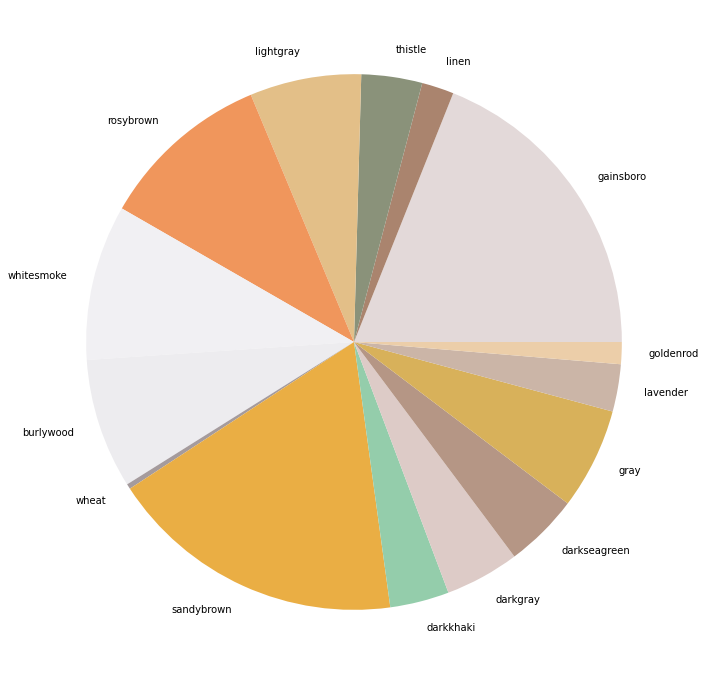

In [101]:
plt.figure(figsize = (12, 16))
plt.pie(color_names.values(), labels = color_names.keys(), colors = hex_colors)
plt.show()

In [103]:
print('Different Colors from Image : \n',color_names.keys())

Different Colors from Image : 
 dict_keys(['gainsboro', 'linen', 'thistle', 'lightgray', 'rosybrown', 'whitesmoke', 'burlywood', 'wheat', 'sandybrown', 'darkkhaki', 'darkgray', 'darkseagreen', 'gray', 'lavender', 'goldenrod'])


#### Observations:
* From pie chart created from pixel histogram method, distribution of colors is same as present in  input image